# Life Expectancy Analysis

In [61]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### 1st Dataset loaded and cleaned

In [64]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'])

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)

# Change any NaN values to ""
Life_Exp_df.fillna('', inplace = True)

Life_Exp_df

,Country,Year,Life Expectancy Male,Life Expectancy Female
0,Aruba,1960,60.6,67.8
1,Africa Eastern and Southern,1960,42.5,45.7
2,Afghanistan,1960,31.9,33.3
3,Africa Western and Central,1960,36.4,39.4
4,Angola,1960,36.6,39.9
...,...,...,...,...
16060,Kosovo,2022,,
16061,"Yemen, Rep.",2022,,
16062,South Africa,2022,,
16063,Zambia,2022,,


In [ ]:
# Remove excess decimal places
Life_Exp_df['GDP'] = Life_Exp_df['GDP'].round(2)

Life_Exp_df

NameError: name 'Life_Exp_df' is not defined

In [ ]:
# Reduce original dataframe to relevant columns only
Life_Exp_Core_df = Life_Exp_df[['Life Expectancy', 'Year', 'Country', 'GDP', 'Population', 'BMI']]

Life_Exp_Core_df.tail()

NameError: name 'Life_Exp_df' is not defined

In [ ]:
# Number of Countries in this dataset
Life_Exp_Core_df['Country'].nunique()

193

### 2nd Dataset loaded and cleaned

In [ ]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/GDP Growth Data.csv')

GDP_Growth_df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5


In [ ]:
# Removing rows where '1980' column has the value "no data"
GDP_Growth_df = GDP_Growth_df[(GDP_Growth_df['2000'] != 'no data') & (~GDP_Growth_df['2000'].isna())]

# Remove columns outside of 2000 - 2015
GDP_Growth_df = GDP_Growth_df[['Real GDP growth (Annual percent change)', '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Rename Country column
GDP_Growth_df.rename(columns = {'Real GDP growth (Annual percent change)': 'Country'}, inplace = True)

GDP_Growth_df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2,Albania,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6,7.5,3.4,3.7,2.5,1.4,1,1.8,2.2
3,Algeria,3.8,3,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7
5,Angola,3.1,4.2,13.7,3,11,15,11.5,14,11.2,0.9,4.9,3.5,8.5,5,4.8,0.9
6,Antigua and Barbuda,6.2,-4.5,1,6.1,5.8,6.5,12.7,9.3,0,-12,-7.8,-2,3.4,-0.6,3.8,3.8
7,Argentina,-0.8,-4.4,-10.9,9,8.9,8.9,8,9,4.1,-5.9,10.1,6,-1,2.4,-2.5,2.7


In [ ]:
# Reshape the GDP_Growth_df so that years are listed in rows instead of columns

GDP_Growth_df_melted = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

# Convert the 'Year' column to integers
GDP_Growth_df_melted['Year'] = GDP_Growth_df_melted['Year'].astype(int)

### Merge dataframes into one set

In [ ]:
# Merge the two dataframes on Country and Year

Life_Exp_Report_df = pd.merge(Life_Exp_Core_df, GDP_Growth_df_melted, on = ['Country', 'Year'])

# Life_Exp_Report_df

max_value = Life_Exp_Report_df['BMI'].max()

print(max_value)

81.6


In [ ]:
# How many countries in the combined set?
Life_Exp_Report_df['Country'].nunique()

155

### Line Chart showing life expectancy over time

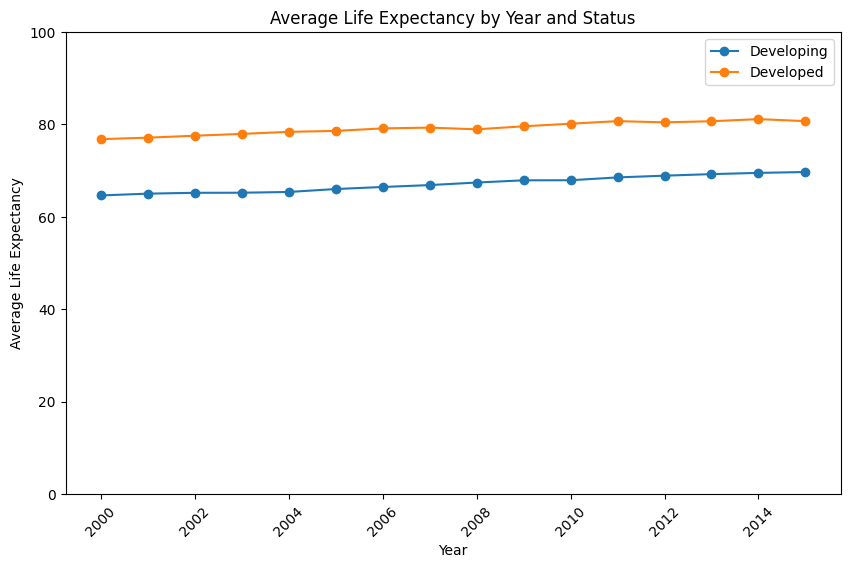

In [ ]:

# Grouping by 'Year' and 'Status' and calculating average life expectancy
grouped_df = Life_Exp_df.groupby(['Year', 'Status'])['Life Expectancy'].mean().reset_index()

# Splitting the data based on 'Status'
developing_df = grouped_df[grouped_df['Status'] == 'Developing']
developed_df = grouped_df[grouped_df['Status'] == 'Developed']

# Creating the line chart
plt.figure(figsize=(10, 6))  

# Line plot for 'Developing' status
plt.plot(developing_df['Year'], developing_df['Life Expectancy'], label='Developing', marker='o')

# Line plot for 'Developed' status
plt.plot(developed_df['Year'], developed_df['Life Expectancy'], label='Developed', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Status')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=45) 

plt.show()

### Scatter Plot showing Life Expectancy vs. Population

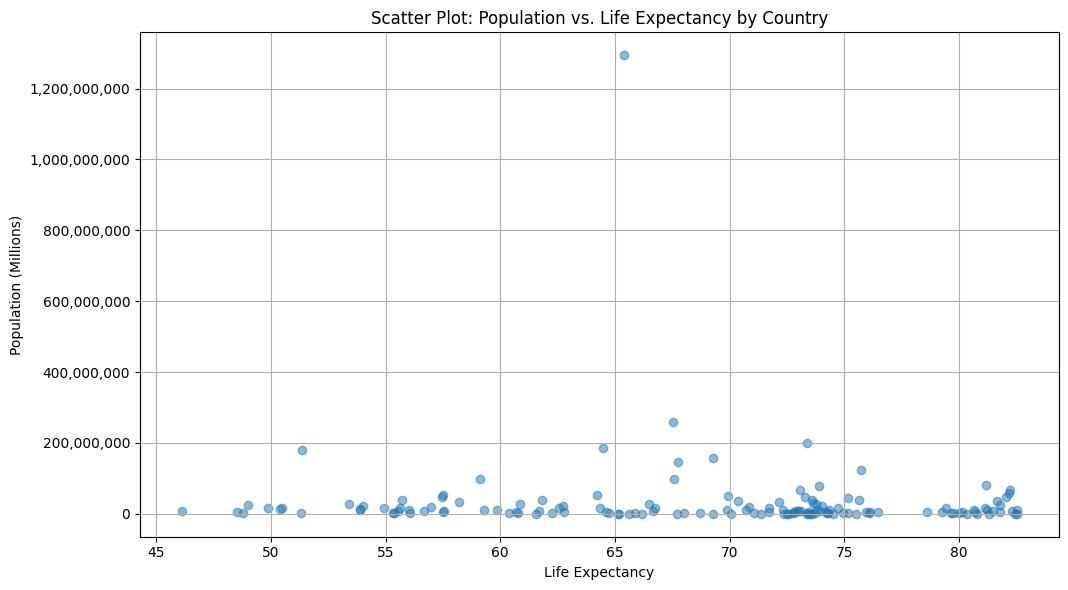

In [ ]:
# Group by 'Country' and calculate the average 'Life Expectancy' and total 'Population'
grouped_df = Life_Exp_df.groupby('Country').agg({
    'Life Expectancy': 'mean',
    'Population': 'max'
}).reset_index()

# Reverse the x and y-axis data
x = grouped_df['Life Expectancy']
y = grouped_df['Population']

# Convert population values to millions for labeling
y_labels_millions = [val / 1000000 for val in y]

plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed.
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of the points.

plt.xlabel('Life Expectancy')
plt.ylabel('Population (Millions)')  # Label the y-axis with population in millions
plt.title('Scatter Plot: Population vs. Life Expectancy by Country')

plt.grid(True)  # Add a grid to the plot.
plt.tight_layout()  # Improve spacing between elements.

# Format y-axis labels to display population in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()  # Display the plot.

In [ ]:
Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]
Outliers_df

/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_1723/2606399926.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]


,Country,Life Expectancy,Population
80,Ireland,80.1500,4676835.0
81,Israel,81.3000,82157.0
82,Italy,82.1875,59539717.0
84,Japan,82.5375,127854.0
85,Jordan,72.9875,8413464.0


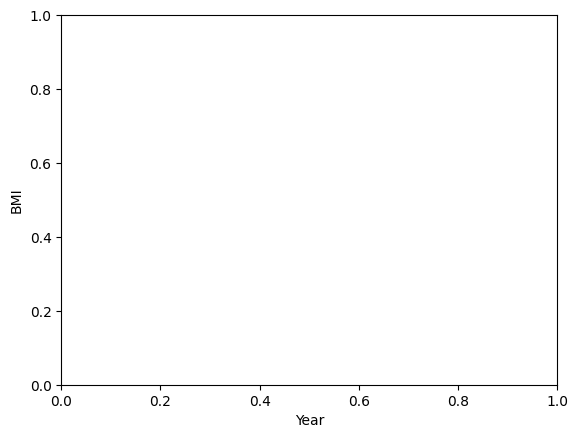

In [ ]:
x_values = Life_Exp_Core_df['Year']
y_values = Life_Exp_Core_df['BMI']

plt
plt.xlabel('Year')
plt.ylabel('BMI')
plt.show()



NameError: name 'DataFrame' is not defined

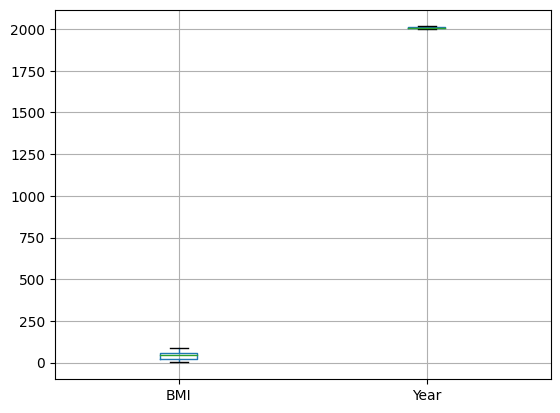

In [ ]:

Life_Exp_Core_df[['BMI', 'Year']].boxplot()

DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)


In [ ]:
# Calculate average BMI and Life Expectancy grouped by 'Country'

avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'Life_Exp_Report_df' with columns 'Country', 'BMI', and 'Life Expectancy'

# Calculate average BMI and Life Expectancy grouped by 'Country'
avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_avg, y_avg)

# Create the linear regression line using the calculated slope and intercept
regression_line = slope * x_avg + intercept

# Plot the linear regression line
plt.plot(x_avg, regression_line, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

### attempt to Access World Health Organization's data directly using 'GHO' API

In [ ]:

# Retrieving the list of available dimensions
# Simply specifying the /api/DIMENSION URL will provide you with the list of available dimension codes. 
# The default result is returned in the Observatory's XML schema. 

url = "https://ghoapi.azureedge.net/api/Dimension/ASSISTIVETECHSATISERVICE"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

data

In [ ]:
# Attempt to request specific data

base_url = "https://frontdoor-r5quteqglawbs.azurefd.net/HEM/"

response = requests.get(base_url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

data

In [ ]:
# append dataset url to end of base_url

data_url = base_url + "rep_gho_tobacco"

response = requests.get(data_url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

print(data_url)

data

